# Descritivo do Projeto

Nós fomos contratados como cientistas de dados de uma empresa imobiliária. Nossa principal função é dar suporte as demandas do time de Machine Learning e do time de Desenvolvimento dessa empresa.

Para atendermos essas demandas, foi disponibilizado um board no Trello, com as etapas e tarefas do projeto que devemos realizar. Também foi disponibilizada uma base de dados, que utilizaremos para desenvolver o projeto.

A base de dados que vamos utilizar para desenvolver o projeto é uma base com dados de diferentes tipos de imóveis do Rio de Janeiro, como apartamento, casas, comércios, dentre outros.

Nessa base, nós vamos encontrar os valores dos aluguéis de cada imóvel, condomínio, IPTU e também suas características, como: quantidade de quartos, suítes, vagas de garagem, etc.

Link para acessar a base de dados: https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv

# Conhecendo a base de dados

O primeiro passo para começarmos o projeto é importar a base de dados e verificar algumas características gerais, como:

* quantidade de linhas e colunas;

* quais as colunas da base de dados;

* explorar as diferentes colunas existentes;

* verificar os tipos dos dados.

## Importando os dados


In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv" # Base de Dados

In [3]:
base_dados = pd.read_csv(url, sep=";") # Fazer a leitura dos dados e atribui-los a uma variável!

In [4]:
base_dados.head() # Ler as primeiras linhas

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [5]:
base_dados.tail() # Ler as últimas linhas

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


In [6]:
type(base_dados)

pandas.core.frame.DataFrame

## Características gerais da base de dados

In [7]:
base_dados.shape # Identificar o formato da nossa base!

(32960, 9)

In [8]:
base_dados.columns # Nomes das colunas.

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [9]:
base_dados.info() # Informações sobre os dados da Base

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [10]:
base_dados["Tipo"]

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Apartamento
...,...
32955,Quitinete
32956,Apartamento
32957,Apartamento
32958,Apartamento


In [11]:
base_dados[["Quartos", "Valor"]]

,Quartos,Valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


# Análise exploratória de dados

O processo de Análise Exploratória de Dados (EDA) consiste em buscar entender como são estruturados os dados que queremos analisar.

É um processo de caráter investigativo, onde tentamos compreender várias características, como: os valores presentes nas colunas, os tipos de estrutura de dados, verificar se são dados qualitativos ou quantitativos, se há valores faltantes ou incomuns.

Por isso, nesse momento, perguntas sobre os dados são sempre bem-vindas. Elas irão guiar todo o processo de análise, e, através das ferramentas disponíveis, como o nosso querido Pandas, iremos buscar por respostas.

Algumas perguntas que podemos fazer nesse momento:

1. Quais os valores médios de aluguel por tipo de imóvel?

2. Qual o percentual de cada tipo de imóvel na nossa base de dados?

## Qual o valor médio de aluguel por tipo de imóvel?

In [12]:
base_dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [13]:
# Média dos Valores
round(base_dados["Valor"].mean(), 2)

np.float64(12952.66)

In [14]:
# Média dos Valores por Tipo
round(base_dados.groupby("Tipo").mean(numeric_only=True), 2)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Tipo,,,,,,,
Apartamento,2.48,1.23,0.88,119.79,4744.61,1722.65,686.17
Box/Garagem,0.06,1.30,0.00,17.52,1899.76,305.45,125.85
Casa,3.13,1.80,1.26,250.58,6793.45,931.28,1582.51
Casa Comercial,1.56,2.20,0.26,372.24,14478.26,1935.71,1707.39
Casa de Condomínio,4.01,3.10,2.86,456.16,11952.06,1342.03,3252.52
Casa de Vila,1.93,0.39,0.23,78.47,1574.37,138.77,183.88
Chácara,3.00,0.00,0.00,0.00,4900.00,NaN,NaN
Conjunto Comercial/Sala,0.04,2.52,0.01,214.47,14715.05,4512.22,1399.60
Flat,1.42,0.96,0.75,65.48,4546.19,2027.72,493.17


In [15]:
# Média dos Valores de aluguél por Tipo
round(base_dados.groupby("Tipo")["Valor"].mean(), 2)

,Valor
Tipo,
Apartamento,4744.61
Box/Garagem,1899.76
Casa,6793.45
Casa Comercial,14478.26
Casa de Condomínio,11952.06
Casa de Vila,1574.37
Chácara,4900.00
Conjunto Comercial/Sala,14715.05
Flat,4546.19


In [16]:
round(base_dados.groupby("Tipo")[["Valor"]].mean().sort_values("Valor"), 2)

,Valor
Tipo,
Quitinete,1246.84
Pousada/Chalé,1480.00
Casa de Vila,1574.37
Box/Garagem,1899.76
Studio,2400.00
Loft,2557.88
Flat,4546.19
Apartamento,4744.61
Chácara,4900.00


<Axes: ylabel='Tipo'>

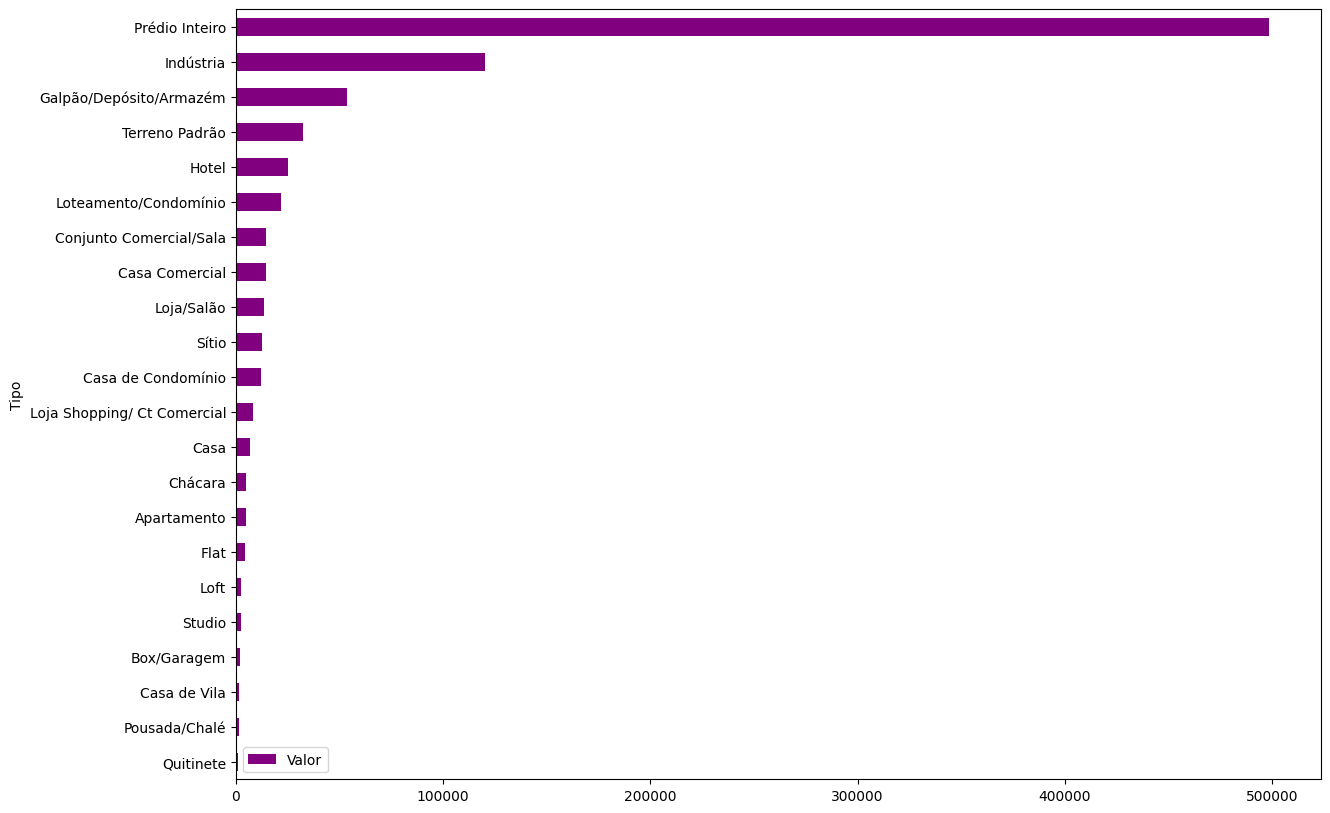

In [17]:
# Fazer uma plotagem gráfica dos dados de Valores médios de aluguel p/ tipo de imóvel
df_preco_tipo = round(base_dados.groupby("Tipo")[["Valor"]].mean().sort_values("Valor"), 2)
df_preco_tipo.plot(kind="barh", figsize=(14, 10), color="purple")

## Removendo os imóveis comerciais

In [18]:
lista = base_dados.Tipo.unique()

In [19]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

In [20]:
base_dados.query("@imoveis_comerciais in Tipo")

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [21]:
base_dados.query("@imoveis_comerciais not in Tipo")

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [22]:
df = base_dados.query("@imoveis_comerciais not in Tipo")
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [23]:
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

<Axes: ylabel='Tipo'>

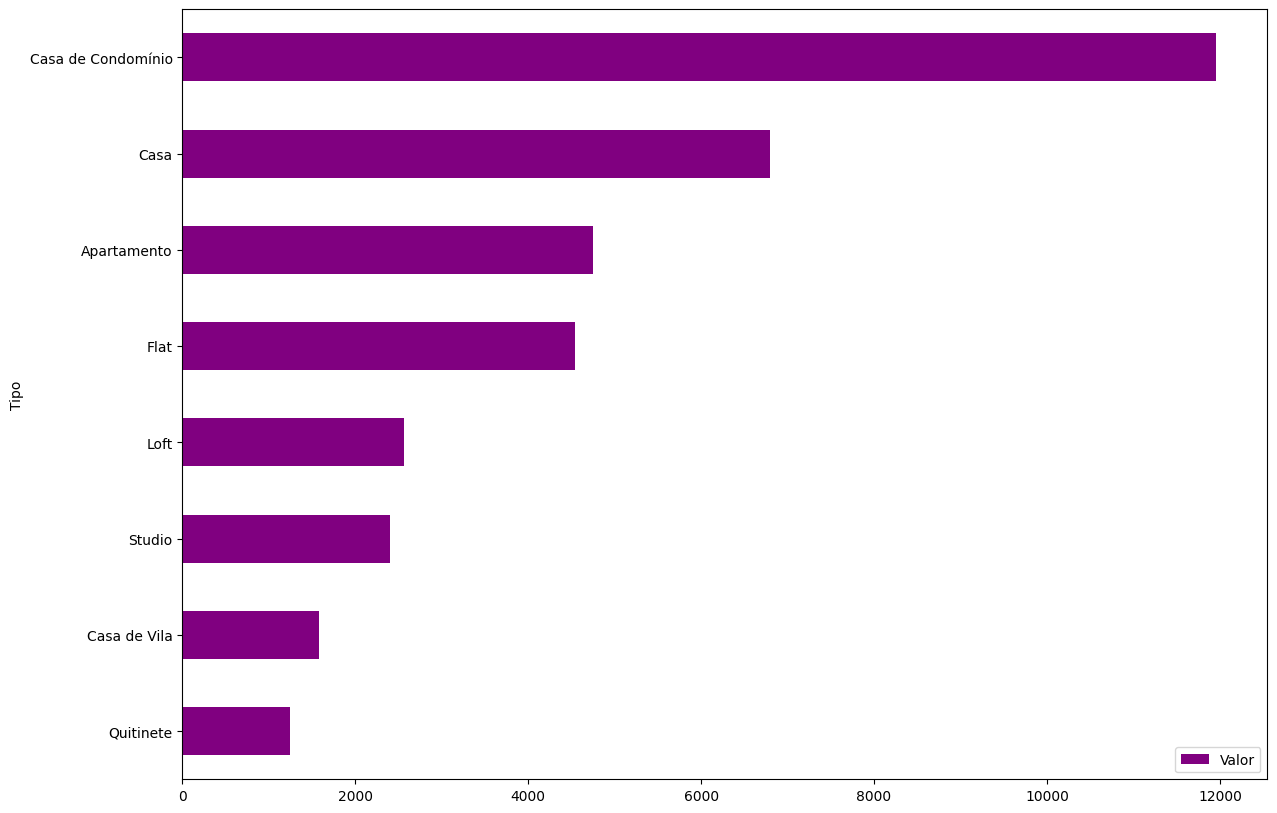

In [24]:
df_preco_tipo = round(df.groupby("Tipo")[["Valor"]].mean().sort_values("Valor"), 2)
df_preco_tipo.plot(kind="barh", figsize=(14, 10), color="purple")

## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [25]:
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

In [26]:
df.Tipo.value_counts(normalize=True)

,proportion
Tipo,
Apartamento,0.845139
Casa de Condomínio,0.043096
Casa,0.041842
Quitinete,0.036173
Flat,0.020596
Casa de Vila,0.010774
Loft,0.002207
Studio,0.000173


In [27]:
df.Tipo.value_counts(normalize=True).to_frame().sort_values("Tipo")

,proportion
Tipo,
Apartamento,0.845139
Casa,0.041842
Casa de Condomínio,0.043096
Casa de Vila,0.010774
Flat,0.020596
Loft,0.002207
Quitinete,0.036173
Studio,0.000173


<Axes: xlabel='Tipos', ylabel='Percentual'>

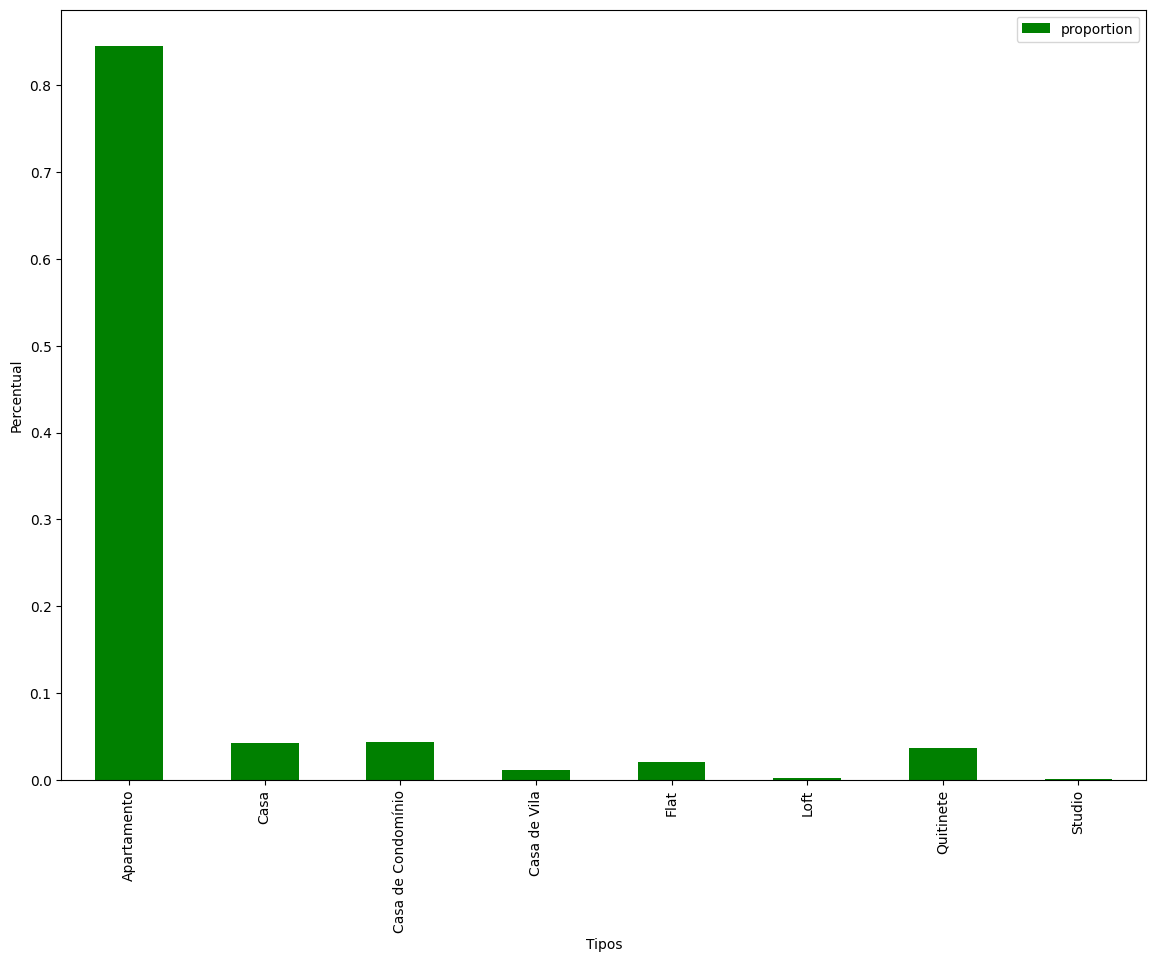

In [28]:
df_percentual_tipo = df.Tipo.value_counts(normalize=True).to_frame().sort_values("Tipo")
df_percentual_tipo.plot(kind="bar", figsize=(14, 10), color="green", xlabel="Tipos", ylabel="Percentual")

### **Selecionando apenas os imóveis do tipo apartamento**

In [29]:
df.query("Tipo == 'Apartamento'")

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [30]:
df = df.query("Tipo == 'Apartamento'")
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


In [36]:
# 1) Calcular a média de quartos dos imóveis;
residencias = base_dados.query("@imoveis_comerciais not in Tipo")
round(residencias.groupby("Tipo")[["Quartos"]].mean().sort_values("Quartos"), 2)

,Quartos
Tipo,
Studio,0.50
Quitinete,0.83
Loft,1.12
Flat,1.42
Casa de Vila,1.93
Apartamento,2.48
Casa,3.13
Casa de Condomínio,4.01


In [48]:
# 2) Conferir quantos bairros únicos existem na nossa base de dados;
bairros = base_dados.Bairro.unique()
print(f"Existem {len(bairros)} bairros únicos na base de dados.")

Existem 162 bairros únicos na base de dados.


In [52]:
# 3) Analisar quais bairros possuem a média de valor de aluguel mais elevadas;
df.groupby('Bairro')[['Valor']].mean().sort_values('Valor', ascending=False)

,Valor
Bairro,
Joá,15500.000000
Arpoador,12429.769231
Cidade Jardim,12000.000000
Ipanema,9487.205317
Botafogo,9369.207116
...,...
Inhoaíba,650.000000
Cosmos,610.000000
Santa Cruz,590.000000


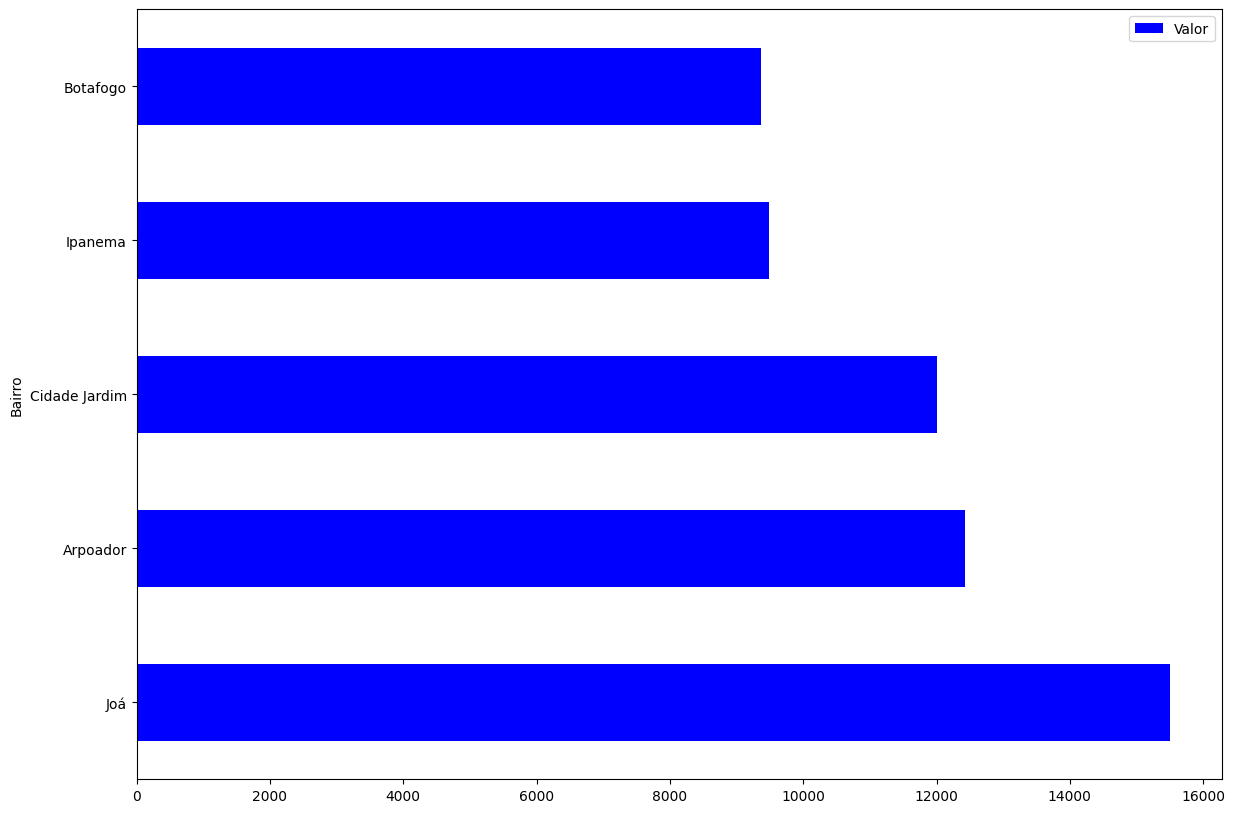

In [53]:
# 4) Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.
df_bairros = df.groupby('Bairro')[['Valor']].mean().sort_values('Valor', ascending=False).head()
df_bairros.plot(kind='barh', figsize=(14,10), color='blue');

# Tratando e filtrando os dados

Como nossos dados serão usados pelo time de ML para criação de um modelo de precificação de imóveis, é importante tratarmos os dados nulos, uma vez que dados nulos não podem ser utilizados no treinamento de modelos de ML.


Além disso, alguns registros existentes na base de dados não fazem muito sentido, por exemplo:

* apartamentos que possuem valor de aluguel igual a 0;

* apartamentos com o valor do condomínio igual a 0.

Esses registros são inconsistentes, por isso devemos removê-los da nossa base de dados.

## Lidando com dados nulos

In [54]:
df.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True,True
6,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
32951,False,False,False,False,False,False,False,False,True
32953,False,False,False,False,False,False,False,False,False
32956,False,False,False,False,False,False,False,False,False
32957,False,False,False,False,False,False,False,False,False


In [55]:
df.isnull().sum()

,0
Tipo,0
Bairro,0
Quartos,0
Vagas,0
Suites,0
Area,0
Valor,7
Condominio,745
IPTU,5472


In [56]:
df.fillna(0)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [57]:
df = df.fillna(0)

In [58]:
df.isnull().sum()

,0
Tipo,0
Bairro,0
Quartos,0
Vagas,0
Suites,0
Area,0
Valor,0
Condominio,0
IPTU,0


## Removendo registros

In [59]:
df.query("Valor == 0 | Condominio == 0")

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
76,Apartamento,Barra da Tijuca,2,1,1,70,0.0,970.0,68.0
113,Apartamento,Praça Seca,2,0,0,80,1000.0,0.0,0.0
166,Apartamento,Rocha Miranda,2,1,0,50,1100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32609,Apartamento,Copacabana,3,0,0,130,4600.0,0.0,0.0
32643,Apartamento,Guadalupe,1,0,0,40,550.0,0.0,0.0
32666,Apartamento,Bonsucesso,1,0,0,60,1000.0,0.0,0.0
32708,Apartamento,Flamengo,2,0,0,59,3500.0,0.0,0.0


In [61]:
registro_remover = df.query("Valor == 0 | Condominio == 0").index

In [62]:
df.drop(registro_remover, axis=0, inplace=True)

In [63]:
df.query("Valor == 0 | Condominio == 0")

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [64]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


In [65]:
df.Tipo.unique()

array(['Apartamento'], dtype=object)

In [66]:
df.drop("Tipo", axis=1, inplace=True)

In [67]:
df.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


## Filtros

Nesse momento, o time de ML deseja avaliar apenas imóveis em cenários específicos, como:

1. Apartamentos que possuem 1 quarto e aluguel menor que R$ 1200;

2. Apartamentos que possuem pelo menos 2 quartos, aluguel menor que R$ 3000 e área maior que 70 m².

Com base nisso, precisamos aplicar os filtros necessários para obter essas informações específicas.

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



In [68]:
df["Quartos"] == 1

,Quartos
3,True
4,True
6,False
11,False
12,False
...,...
32951,False
32953,False
32956,False
32957,False


In [72]:
selecao1 = df["Quartos"] == 1

In [73]:
df[selecao1]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
13,Copacabana,1,0,1,40,2000.0,561.0,50.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
...,...,...,...,...,...,...,...,...
32918,Ipanema,1,0,0,55,2000.0,630.0,19.0
32922,Barra da Tijuca,1,1,0,62,1700.0,945.0,180.0
32935,Leblon,1,1,1,50,4300.0,1730.0,259.0
32938,Copacabana,1,0,0,50,1950.0,450.0,70.0


In [74]:
selecao2 = df["Valor"] < 1200

In [75]:
df[selecao2]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
19,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0
23,Olaria,3,1,0,68,1000.0,670.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
...,...,...,...,...,...,...,...,...
32925,Campinho,2,0,0,63,800.0,392.0,0.0
32930,Freguesia (Jacarepaguá),2,1,0,60,500.0,900.0,148.0
32950,Tijuca,1,0,0,28,1000.0,360.0,25.0
32951,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0


In [77]:
selecao_final = (selecao1) & (selecao2)
df[selecao_final]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
32596,Grajaú,1,0,1,37,1000.0,200.0,0.0
32617,Pechincha,1,0,1,69,900.0,640.0,126.0
32627,Glória,1,0,0,46,1100.0,453.0,32.0
32714,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [79]:
df_1 = df[selecao_final]
df_1.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0


### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

In [83]:
selecao = (df["Quartos"] >= 2) & (df["Valor"] < 3000) & (df["Area"] > 70)
df[selecao]

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Botafogo,2,1,0,76,2500.0,740.0,0.0
36,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...
32934,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
32944,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


In [84]:
df_2 = df[selecao]

## Salvando os dados

Para finalizar, precisamos salvar nosso dataframe no formato csv, após todas as análises e tratamentos.

In [85]:
df.to_csv("dados_apartamentos.csv")

In [87]:
pd.read_csv("dados_apartamentos.csv")

,Unnamed: 0,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,3,Centro,1,0,0,15,800.0,390.0,20.0
1,4,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,6,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,11,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
18775,32951,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,32953,Méier,2,0,0,70,900.0,490.0,48.0
18777,32956,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,32957,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [88]:
df.to_csv("dados_apartamentos.csv", index=False)

In [89]:
pd.read_csv("dados_apartamentos.csv")

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [90]:
df.to_csv("dados_apartamentos.csv", index=False, sep=";")

In [91]:
pd.read_csv("dados_apartamentos.csv")

,Bairro;Quartos;Vagas;Suites;Area;Valor;Condominio;IPTU
0,Centro;1;0;0;15;800.0;390.0;20.0
1,Higienópolis;1;0;0;48;800.0;230.0;0.0
2,Cachambi;2;0;0;50;1300.0;301.0;17.0
3,Grajaú;2;1;0;70;1500.0;642.0;74.0
4,Lins de Vasconcelos;3;1;1;90;1500.0;455.0;14.0
...,...
18775,Vila Valqueire;2;0;0;52;1000.0;550.0;0.0
18776,Méier;2;0;0;70;900.0;490.0;48.0
18777,Jacarepaguá;3;1;2;78;1800.0;800.0;40.0
18778,São Francisco Xavier;2;1;0;48;1400.0;509.0;37.0


In [92]:
pd.read_csv("dados_apartamentos.csv", sep=";")

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [96]:
df_1.to_csv("dados_apartamentos_filtro01.csv", index=False)
df_2.to_csv("dados_apartamentos_filtro02.csv", index=False)

In [98]:
pd.read_csv("dados_apartamentos_filtro01.csv")

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Tijuca,1,0,0,48,750.0,772.0,25.0
3,Centro,1,0,0,27,750.0,371.0,19.0
4,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
494,Grajaú,1,0,1,37,1000.0,200.0,0.0
495,Pechincha,1,0,1,69,900.0,640.0,126.0
496,Glória,1,0,0,46,1100.0,453.0,32.0
497,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [99]:
pd.read_csv("dados_apartamentos_filtro02.csv")

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
1,Tijuca,2,1,0,110,1900.0,700.0,138.0
2,Tijuca,2,1,0,78,2000.0,700.0,0.0
3,Botafogo,2,1,0,76,2500.0,740.0,0.0
4,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...
4454,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
4455,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
4456,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
4457,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


# Manipulando os dados

## Criando colunas numéricas

O time de desenvolvedores do site da empresa solicitou a criação de duas novas colunas numéricas na nossa base de dados. No site dos imóveis, eles gostariam de apresentar informações mais sumarizadas em relação a valores. Para isso, essas colunas serão importantes:

* valor_por_mes: essa coluna deve conter os gastos mensais de cada imóvel, incluindo aluguel e condomínio;

* valor_por_ano: essa coluna deve conter os gastos anuais por imóvel, ou seja, IPTU mais 12 meses de aluguel e condomínio.

In [100]:
url = "https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv" # Base de Dados
dados = pd.read_csv(url, sep=";") # Fazer a leitura dos dados e atribui-los a uma variável!
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [102]:
dados["Valor_por_mes"] = dados["Valor"] + dados["Condominio"]
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0


In [103]:
dados["Valor_por_ano"] = dados["IPTU"] + dados["Valor_por_mes"] * 12
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN


## Criando colunas categóricas

O time de desenvolvimento solicitou a criação de mais duas colunas. No entanto, dessa vez elas são categóricas:

* Descrição: essa coluna deve possuir uma sumarização das principais informações dos imóveis que serão apresentadas no site: tipo de imóvel, bairro, quantidade de quartos e vagas de garagem;

* Possui_suite: essa deve ser uma coluna que informe apenas se o imóvel possui ou não suítes, sem se importar com a quantidade.

In [105]:
dados["Descricao"] = (
    dados["Tipo"] +
    " em " + dados["Bairro"] +
    " com " + dados["Quartos"].astype(int).astype(str) +
    " quarto(s) e " + dados["Vagas"].astype(int).astype(str) +
    " vagas de garagem."
)

dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 va...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 va...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vaga...
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e ...


In [106]:
dados["Possui_suite"] = dados["Suites"].apply(lambda x: "Sim" if x > 0 else "Não")
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 va...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 va...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vaga...,Não
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e ...,Não


In [108]:
dados.tail()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao,Possui_suite
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1150.0,13825.0,Quitinete em Centro com 0 quarto(s) e 0 vagas ...,Não
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0,31240.0,Apartamento em Jacarepaguá com 3 quarto(s) e 1...,Sim
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0,22945.0,Apartamento em São Francisco Xavier com 2 quar...,Não
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN,3760.0,NaN,Apartamento em Leblon com 2 quarto(s) e 0 vaga...,Não
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0,10706.0,129581.0,Conjunto Comercial/Sala em Centro com 0 quarto...,Não


In [109]:
dados.to_csv("dados_completos_dev.csv", index=False, sep=";")

In [114]:
check = pd.read_csv("dados_completos_dev.csv", sep=";")

In [115]:
check.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 va...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 va...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vaga...,Não
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e ...,Não
